### NLP vs Text Mining
- NLP : 인간의 언어를 이해하는데 집중된 학문(음성인식, AI비서, 챗봇)
- Text Mining : 비정형 텍스트데이터에서 의미 있는 정보를 추출하는 학문


### Text Mining 종류
- 텍스트 분류 : 텍스트가 속하는 카테고리를 분류하는 분석
- 감성분석 : 텍스트에서 나타나는 감정/기분/의견 등을 분석
- 텍스트 요약 : 텍스트에서 중요한 주제를 나타내는 키워드,문장 등을 추출/생성
- 텍스트 군집화와 유사측정도 : 텍스트의 비슷한 정도를 측정하고 그룹핑하는 분석

### 텍스트 분석 프로세스
1. 텍스트 전처리
   - 클렌징(대/소문자 변경, 특수문자 삭제)
   - 토큰화
   - Stop word(불용어)제거 (분석에 사용되지 않는 단어를 뜻함)
   - 어근추출(Stemming/Lemmatization)
      - 영어 : nltk
      - 한국어 : Konlpy(형태소분석기)
2. 피처 벡터화/추출: 정형화 작업, 글자에서 정해진 알고리즘에 따라 숫자로 변경
    - 단순 언어 빈도
    - BOW(Bag of Word)
    - tf-idf
    - word embedding(워드임베딩)
    - BPE(바이트페어인코딩)
3. ML 학습/예측/평가

# 데이터 로딩

In [1]:
import pandas as pd
pd.set_option('display.max_colwidth',100) # 컬럼의 너비를 조정해서 긴 리뷰를 볼 수 있게 세팅

In [2]:
train = pd.read_csv("./data/ratings_train.txt", delimiter="\t")
test = pd.read_csv("./data/ratings_test.txt", delimiter="\t")

In [3]:
display("Train data")
display(train.head())
display("Test data")
display(test.head())

'Train data'

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다,1


'Test data'

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0


#### 결측치 확인

In [4]:
display(train.info())
display(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        150000 non-null  int64 
 1   document  149995 non-null  object
 2   label     150000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        50000 non-null  int64 
 1   document  49997 non-null  object
 2   label     50000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.1+ MB


None

### 결측치 데이터 삭제

In [5]:
train.dropna(inplace=True)
test.dropna(inplace=True)

In [6]:
train.shape, test.shape

((149995, 3), (49997, 3))

### 텍스트 분석시 사용하는 단어
- 말뭉치(copus) : 텍스트분석을 위해 모은 데이터셋
- 문서(document) : 말뭉치 안에 텍스트를 지칭하는 단위

# 단어빈도 분석
- 워드카운트 : 단어의 등장 빈도를 측정하는 알고리즘

In [7]:
text_train = train['document']

In [8]:
# 토큰화작업
# 띄어쓰기 단위로 모든 문장을 쪼개서 리스트에 넣어보자.
import itertools
text_train_list=[]
for i in text_train:
    i = i.split(" ")
    text_train_list.append(i)
token_list = list(itertools.chain(*text_train_list))
token_list

['아',
 '더빙..',
 '진짜',
 '짜증나네요',
 '목소리',
 '흠...포스터보고',
 '초딩영화줄....오버연기조차',
 '가볍지',
 '않구나',
 '너무재밓었다그래서보는것을추천한다',
 '교도소',
 '이야기구먼',
 '..솔직히',
 '재미는',
 '없다..평점',
 '조정',
 '사이몬페그의',
 '익살스런',
 '연기가',
 '돋보였던',
 '영화!스파이더맨에서',
 '늙어보이기만',
 '했던',
 '커스틴',
 '던스트가',
 '너무나도',
 '이뻐보였다',
 '막',
 '걸음마',
 '뗀',
 '3세부터',
 '초등학교',
 '1학년생인',
 '8살용영화.ㅋㅋㅋ...별반개도',
 '아까움.',
 '원작의',
 '긴장감을',
 '제대로',
 '살려내지못했다.',
 '별',
 '반개도',
 '아깝다',
 '욕나온다',
 '이응경',
 '길용우',
 '연기생활이몇년인지..정말',
 '발로해도',
 '그것보단',
 '낫겟다',
 '납치.감금만반복반복..이드라마는',
 '가족도없다',
 '연기못하는사람만모엿네',
 '액션이',
 '없는데도',
 '재미',
 '있는',
 '몇안되는',
 '영화',
 '왜케',
 '평점이',
 '낮은건데?',
 '꽤',
 '볼만한데..',
 '헐리우드식',
 '화려함에만',
 '너무',
 '길들여져',
 '있나?',
 '걍인피니트가짱이다.진짜짱이다♥',
 '볼때마다',
 '눈물나서',
 '죽겠다90년대의',
 '향수자극!!허진호는',
 '감성절제멜로의',
 '달인이다~',
 '울면서',
 '손들고',
 '횡단보도',
 '건널때',
 '뛰쳐나올뻔',
 '이범수',
 '연기',
 '드럽게못해',
 '담백하고',
 '깔끔해서',
 '좋다.',
 '신문기사로만',
 '보다',
 '보면',
 '자꾸',
 '잊어버린다.',
 '그들도',
 '사람이었다는',
 '것을.',
 '취향은',
 '존중한다지만',
 '진짜',
 '내생에',
 '극장에서',
 '본',
 '영화중',
 '가장',
 '노잼',
 '노감동임',
 '스토리도'

In [9]:
# 예시
tmp = [doc.split(" ") for doc in text_train]

In [10]:
token_list = []
for t in tmp:
    token_list += t
token_list

['아',
 '더빙..',
 '진짜',
 '짜증나네요',
 '목소리',
 '흠...포스터보고',
 '초딩영화줄....오버연기조차',
 '가볍지',
 '않구나',
 '너무재밓었다그래서보는것을추천한다',
 '교도소',
 '이야기구먼',
 '..솔직히',
 '재미는',
 '없다..평점',
 '조정',
 '사이몬페그의',
 '익살스런',
 '연기가',
 '돋보였던',
 '영화!스파이더맨에서',
 '늙어보이기만',
 '했던',
 '커스틴',
 '던스트가',
 '너무나도',
 '이뻐보였다',
 '막',
 '걸음마',
 '뗀',
 '3세부터',
 '초등학교',
 '1학년생인',
 '8살용영화.ㅋㅋㅋ...별반개도',
 '아까움.',
 '원작의',
 '긴장감을',
 '제대로',
 '살려내지못했다.',
 '별',
 '반개도',
 '아깝다',
 '욕나온다',
 '이응경',
 '길용우',
 '연기생활이몇년인지..정말',
 '발로해도',
 '그것보단',
 '낫겟다',
 '납치.감금만반복반복..이드라마는',
 '가족도없다',
 '연기못하는사람만모엿네',
 '액션이',
 '없는데도',
 '재미',
 '있는',
 '몇안되는',
 '영화',
 '왜케',
 '평점이',
 '낮은건데?',
 '꽤',
 '볼만한데..',
 '헐리우드식',
 '화려함에만',
 '너무',
 '길들여져',
 '있나?',
 '걍인피니트가짱이다.진짜짱이다♥',
 '볼때마다',
 '눈물나서',
 '죽겠다90년대의',
 '향수자극!!허진호는',
 '감성절제멜로의',
 '달인이다~',
 '울면서',
 '손들고',
 '횡단보도',
 '건널때',
 '뛰쳐나올뻔',
 '이범수',
 '연기',
 '드럽게못해',
 '담백하고',
 '깔끔해서',
 '좋다.',
 '신문기사로만',
 '보다',
 '보면',
 '자꾸',
 '잊어버린다.',
 '그들도',
 '사람이었다는',
 '것을.',
 '취향은',
 '존중한다지만',
 '진짜',
 '내생에',
 '극장에서',
 '본',
 '영화중',
 '가장',
 '노잼',
 '노감동임',
 '스토리도'

### 토큰화 ver2

In [11]:
token_list = [t for doc in text_train for t in doc.split(" ")]
# for문 진행 순서 1. for doc in text_train
# 2. for t in doc.split(" ")
# 3. t

## Counter 활용 단어빈도 측정

In [12]:
from collections import Counter

In [13]:
counter = Counter(token_list)

In [14]:
counter.most_common(40)

[('영화', 10825),
 ('너무', 8239),
 ('정말', 7791),
 ('진짜', 5929),
 ('이', 5059),
 ('영화.', 3598),
 ('왜', 3285),
 ('더', 3260),
 ('이런', 3249),
 ('그냥', 3237),
 ('수', 2945),
 ('영화를', 2759),
 ('잘', 2644),
 ('다', 2615),
 ('보고', 2557),
 ('좀', 2449),
 ('영화는', 2426),
 ('그', 2421),
 ('영화가', 2418),
 ('본', 2298),
 ('최고의', 2219),
 ('ㅋㅋ', 2019),
 ('내가', 2000),
 ('없는', 1957),
 ('이건', 1889),
 ('이렇게', 1828),
 ('완전', 1780),
 ('평점', 1760),
 ('봤는데', 1746),
 ('있는', 1739),
 ('좋은', 1726),
 ('이거', 1710),
 ('이게', 1676),
 ('보는', 1600),
 ('평점이', 1595),
 ('내', 1595),
 ('다시', 1583),
 ('그리고', 1547),
 ('참', 1508),
 ('많이', 1478)]

### 워드클라우드
- 단어의 빈도를 기반으로 크기를 조절해 시각화하는 방법

In [15]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


In [16]:
from wordcloud import WordCloud # 클래스

In [17]:
wc = WordCloud(background_color="white", font_path="C:/Windows/Fonts/H2GTRE")

In [18]:
reviews = " ".join(token_list)

In [19]:
cloud = wc.generate_from_text(reviews)

In [20]:
import matplotlib.pyplot as plt

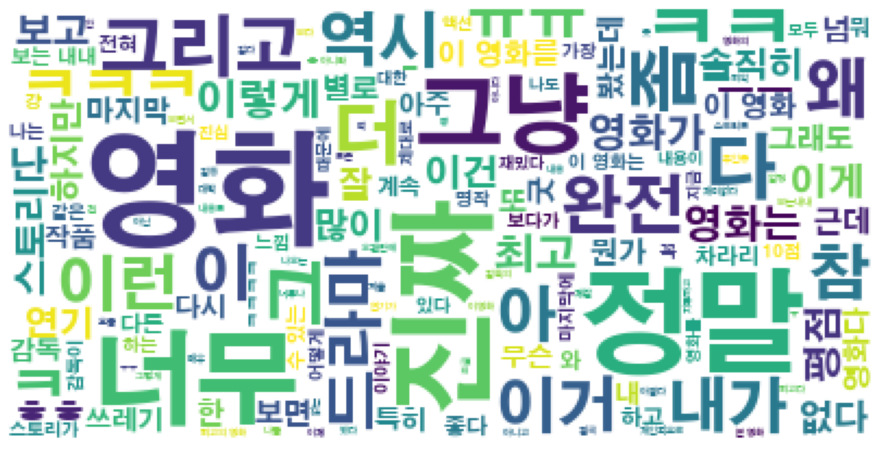

In [21]:
plt.figure(figsize=(20,8))
plt.imshow(cloud)
plt.axis("off") #x축, y축 끄기
plt.savefig("./naver_movie_wordcloud.jpg") #그림저장
plt.show()

### 단어 유사도 분석
- gensim : word2vec, topic modeling등 텍스트마이닝 알고리즘이 구현된 라이브러리
- word2vec : 구글에서 발표한 단어 사이의 관계를 수치화하는 알고리즘

In [22]:
!pip install gensim

Defaulting to user installation because normal site-packages is not writeable


In [23]:
from gensim.models import Word2Vec

In [24]:
w2c = Word2Vec(window=5,    # 중심단어를 기준으로 주변에 몇개단어까지 관계성을 학습할지 결정
               min_count=5, # 전체말뭉치의 최소등장 빈도수 설정(최소빈도에 도딜하지 못하면 학습단어 사용X)
               sg=1,        # 중심단어를 y 주변단어를 x로설정하는 알고리즘(skip-gram)
               vector_size=100, # 한 개의 단어를 몇개의 숫자로 표현할건지
                               # 숫자가 커질수록 각 단어의 관계를 풍부하게 표현가능
               sentences=[doc.split(" ") for doc in text_train]) # 학습할 데이터

In [25]:
w2c.wv.get_vector("영화") # 영화를 표현하는 숫자(100개 숫자)

array([ 0.36444783, -0.03115554,  0.24145836,  0.25352913, -0.22391613,
       -0.30598572,  0.26567432,  0.87147313, -0.48771918, -0.283591  ,
       -0.05439289, -0.210179  ,  0.0482178 , -0.0123071 ,  0.17658243,
       -0.2930367 , -0.14311278, -0.4107595 , -0.28443295, -0.64503276,
       -0.03764333,  0.06856408,  0.45408228, -0.44548467,  0.0595829 ,
       -0.25570455, -0.30050555,  0.07669913, -0.1171316 ,  0.3647135 ,
       -0.13349433, -0.4561613 ,  0.449049  , -0.6517263 , -0.20055622,
        0.16537985,  0.31551683, -0.01382286, -0.23126987, -0.4545415 ,
       -0.4418098 , -0.02301751, -0.08761133,  0.17796028, -0.16799824,
        0.08909989, -0.1607616 ,  0.3320961 ,  0.27083385,  0.46207935,
        0.16600189, -0.22687735,  0.10226453,  0.05749184,  0.27240762,
       -0.17299889,  0.34127223, -0.18166634, -0.41854227,  0.0818433 ,
       -0.23586859,  0.08805624,  0.12333865, -0.05722602, -0.36510912,
        0.16290689,  0.29003155,  0.32822728, -0.18950154,  0.05

In [26]:
w2c.wv.most_similar("이정재")

[('최고였어요', 0.9824053645133972),
 ('최고!!!!', 0.978256344795227),
 ('스릴넘치고', 0.9765178561210632),
 ('최고네요', 0.9759843349456787),
 ('이종석', 0.9758352041244507),
 ('감동입니다', 0.9752592444419861),
 ('굿!!', 0.9750860333442688),
 ('감동감동', 0.9743635058403015),
 ('내일이', 0.9737935662269592),
 ('굿굿굿', 0.9725391268730164)]

# 감성분석
- 감성사전을 이용한 분석
- 머신러닝을 이용한 분석
   1. 토큰화 진행
   2. BOW / tf-idf를 이용해 수치화(정형화)

#### BOW
- 문맥의 순서를 무시하고 단어의 빈도를 이용해 수치화하는 방법
- 문맥의 순서를 무시하기 때문에 자연어처리에서는 부적합하다.
- 하지만 일반 텍스트마이닝에서는 충분히 활용 가치가 있다.

#### BOW 진행순서
1. 단어사전 구축
2. 단어사전을 기반으로 각 문장에서 해당 단어가 등장하는 빈도를 측정

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

In [28]:
cv_test = CountVectorizer()

In [29]:
temp = ["안녕 나는 뽀로로야",
        "오늘 점심은 뽀로로야",
        "안녕 나는 오늘 점심에 뽀로로를 먹을꺼야",
        "너는 오늘 나와 집에 같이 가자"]

In [30]:
# 단어사전 구축
# 영어 -> 대문자를 소문자로 변경, 1글자 제외, 띄어쓰기를 기준으로 토큰화
# 한글 -> 띄어쓰기를 기준으로 토큰화
cv_test.fit(temp)

CountVectorizer()

In [31]:
display(len(cv_test.vocabulary_))# 등록된 단어의 갯수 확인
display(cv_test.vocabulary_)

13

{'안녕': 8,
 '나는': 2,
 '뽀로로야': 7,
 '오늘': 9,
 '점심은': 11,
 '점심에': 10,
 '뽀로로를': 6,
 '먹을꺼야': 5,
 '너는': 4,
 '나와': 3,
 '집에': 12,
 '같이': 1,
 '가자': 0}

In [32]:
#단어 빈도를 측정한 수치화
cv_test.transform(temp)

<4x13 sparse matrix of type '<class 'numpy.int64'>'
	with 18 stored elements in Compressed Sparse Row format>

### 학습데이터구성

In [33]:
naver_moive_cv=CountVectorizer()
naver_moive_cv.fit(text_train) # 단어사전 구축
X_train = naver_moive_cv.transform(text_train) # 빈도기반의수치화
X_test = naver_moive_cv.transform(test['document'])

In [34]:
y_train = train['label'] # 0: 부정 1: 긍정
y_test = test['label']

In [35]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(149995, 293366) (149995,)
(49997, 293366) (49997,)


### 모델링

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [37]:
log_model = LogisticRegression()

In [38]:
rs = cross_val_score(log_model, X_train, y_train, cv =3)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [39]:
rs

array([0.81111622, 0.80533221, 0.80879235])

In [40]:
#예측
log_model.fit(X_train,y_train)
sample_review =['이 영화는 이제껏 보여줬고 보여줘야했던 토르의 인생이 얼마나 굴곡지고 외롭고 가슴 아픈지를 아주 가벼운 연출로 보여주면서 그 슬픔을 희석 시켜줍니다. 만약 이 내용을 아주 진지하게 그려냈다면 보다가 중간에 포기했을 것 같아요. 제인과 토르의 이야기도 발키리의 개인 서사도 잘 다뤄주면서 동시에 토르가 처한 상황과 그가 잃은 것들이 얼마나 많고 그게 얼마나 슬픈 것인지도 보여줍니다. 그러면서 마지막엔 희망을 이야기하기까지 합니다. 히어로물이라는 장르를 사랑한 이유가 바로 이 마지막때문인데 그런 면에서 아주 좋았습니다.',
               '스토리 전개가 그냥 이상하고 다 끊기는 느낌 이거 재밌다는 사람들 부럽다 온세상이 재밌을 듯 토르3 때문에 믿었는데 올해 최고의 믿는 도끼였다',
               '탑건을 차라리 한 번 더 보세요…. 하 왜 봤지. 스토리가 물음표 그 자체',
               '고편을 안보고 봤으면 조금 나았을 듯한? 느낌예고편을 봐서 이미 웃긴 장면을 한번씩 보고 간 느낌이라 정작 극장에선 그렇게 웃기진 않았음,, 영화 끝나고 기억나는건 염소 울음소리 뿐,,',]
sample_transform = naver_moive_cv.transform(sample_review) # 정형화작업
pre = log_model.predict_proba(sample_transform) #확률값 계산

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
pre

array([[0.00169282, 0.99830718],
       [0.93429934, 0.06570066],
       [0.97787851, 0.02212149],
       [0.84149032, 0.15850968]])

### 학습된 단어(토큰)별 가중치 확인

In [42]:
naver_coef = log_model.coef_[0]
len(naver_coef)

293366

In [43]:
naver_vocab = naver_moive_cv.vocabulary_
len(naver_vocab)

293366

In [44]:
print(naver_coef[0])
naver_vocab

0.5279568302485304


{'더빙': 71119,
 '진짜': 246232,
 '짜증나네요': 248358,
 '목소리': 99567,
 '포스터보고': 273335,
 '초딩영화줄': 255126,
 '오버연기조차': 190112,
 '가볍지': 16352,
 '않구나': 167602,
 '너무재밓었다그래서보는것을추천한다': 57394,
 '교도소': 33783,
 '이야기구먼': 208071,
 '솔직히': 145795,
 '재미는': 222295,
 '없다': 177352,
 '평점': 271982,
 '조정': 234711,
 '사이몬페그의': 133947,
 '익살스런': 210575,
 '연기가': 181881,
 '돋보였던': 74028,
 '영화': 185057,
 '스파이더맨에서': 150442,
 '늙어보이기만': 63331,
 '했던': 283593,
 '커스틴': 261359,
 '던스트가': 71680,
 '너무나도': 56734,
 '이뻐보였다': 207059,
 '걸음마': 25696,
 '3세부터': 5282,
 '초등학교': 254957,
 '1학년생인': 3039,
 '8살용영화': 7674,
 'ㅋㅋㅋ': 13347,
 '별반개도': 117898,
 '아까움': 160393,
 '원작의': 198609,
 '긴장감을': 43582,
 '제대로': 232430,
 '살려내지못했다': 134933,
 '반개도': 110754,
 '아깝다': 160496,
 '욕나온다': 194727,
 '이응경': 209070,
 '길용우': 43801,
 '연기생활이몇년인지': 182309,
 '정말': 230402,
 '발로해도': 112228,
 '그것보단': 36866,
 '낫겟다': 53960,
 '납치': 53930,
 '감금만반복반복': 18635,
 '이드라마는': 204973,
 '가족도없다': 17264,
 '연기못하는사람만모엿네': 182260,
 '액션이': 171312,
 '없는데도': 177305,
 '재미': 222156,
 '있는': 2148

In [45]:
# vocab 정렬하기
import pandas as pd
df = pd.DataFrame([naver_vocab.keys(), naver_vocab.values()], index=["단어","인덱스"]).T.sort_values(by="인덱스").set_index("인덱스")
# vacab과 가중치 결합
df['가중치'] = naver_coef
df

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexes\base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


,단어,가중치
인덱스,,
0,00,0.527957
1,000,0.001969
2,0000000000000000,-0.357513
3,00000000000000000000000000000을달라,-0.357513
4,000000000000000001개짜리,-0.147322
...,...,...
293361,힣히히헤ㅎ,0.216165
293362,盧미오,0.346710
293363,綠林의,-0.146850


In [46]:
# 가중치를 중심으로 정렬 -> 상위 30, 하위 30개 단어추출
df.sort_values(by="가중치", inplace=True, ascending=False)
top30 =df.head(30)
bottom30 = df.tail(30)

<AxesSubplot:xlabel='단어'>

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51116 (\N{HANGUL SYLLABLE JAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51080 (\N{HANGUL SYLLABLE ISS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50612 (\N{HANGUL SYLLABLE EO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib

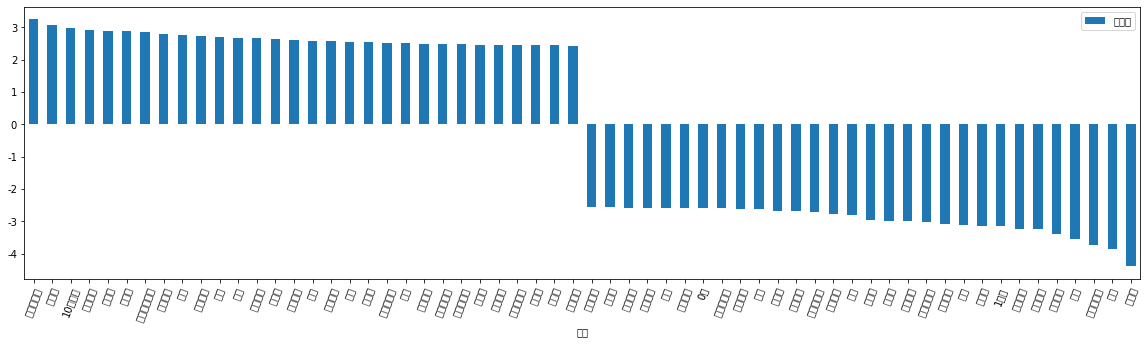

In [47]:
#시각화
# 한글로 출력하기 위해서 폰트 지정하기
from matplotlib import rc
#마이너스 나오게하기
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

#시각화
main_words = pd.concat([top30,bottom30])
main_words.set_index("단어").plot(kind='bar',
                                  figsize=(20,5), rot=70)

## tf-idf
- tf : 개별문서에서의 특정 단어 빈도
    - 특정문서에서 특정단어의 빈도가 높으면 해당문서를 대표하는 특정이 된다.
- df : 특정단어를 가지고 있는 문서의 개수
    - 전체 말뭉치에서 너무 과도하게 등장하면 특징으로서 의미가 없어진다.

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

### 하이퍼 파라미터 튜닝
- 파이프라인을 이용해 텍스트 전처리와 모델링 2단계로 이루어진 작업을 병합하자
- TfidfVectorizer 하이퍼하라미터
   - max_df : 특정단어가 말뭉치에서 등장하는 최대 횟수 지정
   - min_df : 특정단어가 말뭉치에서 등장하는 최소 횟수 지정
   - max_features : feature로 최대 사용되는 단어 수를 지정
   - stop_words : 분석에서 사용하지 않는 단어를 지정
   - n_gram_rage : 토큰을 묶어서 feature로 활용하느 정도를 지정
- LogisticfRegression 하이퍼파라미터
   - C : 규제 파라미터 -> 값이 커지면 규제가 약한, 값이 작아지면 규제가 커진다.
   

In [50]:
# 파이프 라인 생성
# 파이프라인 : 머신러닝 작업을 하나의 프로세스로 묶어주는 것
# ex) 결측치 -> 스케일러 -> 인코더 -> 모델
from sklearn.pipeline import Pipeline

In [51]:
pipeline = Pipeline([
    ('movie_tfidf', TfidfVectorizer()),
    ('movie_logi', LogisticRegression())
])

In [52]:
from sklearn.model_selection import GridSearchCV

In [58]:
grid_param = {
    "movie_tfidf__max_df":[7000,8500,10000],
    "movie_tfidf__min_df":[1,5,8,10],
    "movie_tfidf__ngram_range":[(1,2),(2,2),(1,3)],
    "movie_logi__C":[0.001, 0.01, 0.1,10,100,1000]
}

In [59]:
grid = GridSearchCV(pipeline, grid_param, cv=3, n_jobs= -1)
grid.fit(text_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('movie_tfidf', TfidfVectorizer()),
                                       ('movie_logi', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'movie_logi__C': [0.001, 0.01, 0.1, 10, 100, 1000],
                         'movie_tfidf__max_df': [7000, 8500, 10000],
                         'movie_tfidf__min_df': [1, 5, 8, 10],
                         'movie_tfidf__ngram_range': [(1, 2), (2, 2), (1, 3)]})

In [61]:
rs.mean()

0.8084135957690153

In [62]:
#결과 확인
print("최고점수 : ", grid.best_score_)
print("최고조합 : ", grid.best_params_)
# 최적의 파라미터로 학습된 모델
best_model = grid.best_estimator_
# 단어사전 수 
print(len(best_model.steps[0][1].vocabulary_))

최고점수 :  0.8138871233762929
최고조합 :  {'movie_logi__C': 1000, 'movie_tfidf__max_df': 7000, 'movie_tfidf__min_df': 1, 'movie_tfidf__ngram_range': (1, 2)}
1088746


In [70]:
best_model.predict(["이 영화는 너무 재밌다.", "진짜 별로네요 내 마음의 별로..."])

array([1, 0], dtype=int64)

# 한국어를 위한 Konlpy 사용하기

In [4]:
from konlpy.tag import Kkma
from konlpy.tag import Okt

In [5]:
kkm = Kkma()
okt = Okt()

In [3]:
kkm.morphs("아버지가 방에 들어가신다.") # 형태소 단위로 추출

['아버지', '가', '방', '에', '들어가', '시', 'ㄴ다', '.']

In [6]:
okt.morphs("아버지가 방에 들어가신다.")

['아버지', '가', '방', '에', '들어가신다', '.']

###  품사 추출

In [7]:
kkm.pos("아버지가 방에 들어가신다.")

[('아버지', 'NNG'),
 ('가', 'JKS'),
 ('방', 'NNG'),
 ('에', 'JKM'),
 ('들어가', 'VV'),
 ('시', 'EPH'),
 ('ㄴ다', 'EFN'),
 ('.', 'SF')]

In [8]:
kkm.tagset

{'EC': '연결 어미',
 'ECD': '의존적 연결 어미',
 'ECE': '대등 연결 어미',
 'ECS': '보조적 연결 어미',
 'EF': '종결 어미',
 'EFA': '청유형 종결 어미',
 'EFI': '감탄형 종결 어미',
 'EFN': '평서형 종결 어미',
 'EFO': '명령형 종결 어미',
 'EFQ': '의문형 종결 어미',
 'EFR': '존칭형 종결 어미',
 'EP': '선어말 어미',
 'EPH': '존칭 선어말 어미',
 'EPP': '공손 선어말 어미',
 'EPT': '시제 선어말 어미',
 'ET': '전성 어미',
 'ETD': '관형형 전성 어미',
 'ETN': '명사형 전성 어미',
 'IC': '감탄사',
 'JC': '접속 조사',
 'JK': '조사',
 'JKC': '보격 조사',
 'JKG': '관형격 조사',
 'JKI': '호격 조사',
 'JKM': '부사격 조사',
 'JKO': '목적격 조사',
 'JKQ': '인용격 조사',
 'JKS': '주격 조사',
 'JX': '보조사',
 'MA': '부사',
 'MAC': '접속 부사',
 'MAG': '일반 부사',
 'MD': '관형사',
 'MDN': '수 관형사',
 'MDT': '일반 관형사',
 'NN': '명사',
 'NNB': '일반 의존 명사',
 'NNG': '보통명사',
 'NNM': '단위 의존 명사',
 'NNP': '고유명사',
 'NP': '대명사',
 'NR': '수사',
 'OH': '한자',
 'OL': '외국어',
 'ON': '숫자',
 'SE': '줄임표',
 'SF': '마침표, 물음표, 느낌표',
 'SO': '붙임표(물결,숨김,빠짐)',
 'SP': '쉼표,가운뎃점,콜론,빗금',
 'SS': '따옴표,괄호표,줄표',
 'SW': '기타기호 (논리수학기호,화폐기호)',
 'UN': '명사추정범주',
 'VA': '형용사',
 'VC': '지정사',
 'VCN': "부정 지정사, 형용사 '아니다'",
 'VC

In [9]:
okt.pos("아버지가 방에 들어가신다.")

[('아버지', 'Noun'),
 ('가', 'Josa'),
 ('방', 'Noun'),
 ('에', 'Josa'),
 ('들어가신다', 'Verb'),
 ('.', 'Punctuation')]

In [10]:
okt.tagset

{'Adjective': '형용사',
 'Adverb': '부사',
 'Alpha': '알파벳',
 'Conjunction': '접속사',
 'Determiner': '관형사',
 'Eomi': '어미',
 'Exclamation': '감탄사',
 'Foreign': '외국어, 한자 및 기타기호',
 'Hashtag': '트위터 해쉬태그',
 'Josa': '조사',
 'KoreanParticle': '(ex: ㅋㅋ)',
 'Noun': '명사',
 'Number': '숫자',
 'PreEomi': '선어말어미',
 'Punctuation': '구두점',
 'ScreenName': '트위터 아이디',
 'Suffix': '접미사',
 'Unknown': '미등록어',
 'Verb': '동사'}

### sklearn과 연결하기

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

In [27]:
# 사용자정의 tokenizer 함수 정의
def myTokenizer(text):
    rs = okt.pos(text) # 품사부착
    df = pd.DataFrame(rs, columns=["형태소","품사"])
    # 불리언색인
    df2 = df[(df['품사']=='Noun') | (df['품사']=='Adjective')] 
    return df2['형태소']

In [28]:
# tokenizer  파라미터 설정
tfidf = TfidfVectorizer(tokenizer=myTokenizer)

In [29]:
sample_text = ["아버지가 방에 들어가신다.",
               "아름다운 밤하늘에 별이 반짝반짝 빛나고있다.",
               "시원한 계곡 소리를 들으면 맛있는 수박을 먹고 싶다."]

In [30]:
tfidf.fit(sample_text) # 단어사전 구축

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:524: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


TfidfVectorizer(tokenizer=<function myTokenizer at 0x00000248526A9820>)

In [31]:
tfidf.vocabulary_

{'아버지': 9,
 '방': 3,
 '아름다운': 8,
 '밤하늘': 2,
 '별': 4,
 '시원한': 7,
 '계곡': 0,
 '소리': 5,
 '맛있는': 1,
 '수박': 6}